<a href="https://colab.research.google.com/github/tannistha-22/Image-Pre-Processing/blob/master/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Horse vs Human Classifier**

**Gathering Data**

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-09-22 17:58:26--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 74.125.23.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  7.31MB/s    in 1.5s    

2020-09-22 17:58:29 (7.31 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [ ]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [ ]:
# horse training
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# human training
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# horse validation
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# human validation
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [ ]:
print("Data filenames")
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

Data filenames
['horse16-9.png', 'horse44-4.png', 'horse17-9.png', 'horse33-9.png', 'horse08-0.png', 'horse26-4.png', 'horse46-9.png', 'horse19-0.png', 'horse09-2.png', 'horse34-0.png']
['human02-07.png', 'human05-20.png', 'human17-13.png', 'human13-17.png', 'human11-22.png', 'human05-24.png', 'human09-01.png', 'human02-10.png', 'human03-15.png', 'human06-25.png']
['horse5-565.png', 'horse3-099.png', 'horse4-188.png', 'horse5-002.png', 'horse4-014.png', 'horse1-122.png', 'horse4-439.png', 'horse1-298.png', 'horse2-269.png', 'horse6-403.png']
['valhuman05-06.png', 'valhuman01-14.png', 'valhuman04-16.png', 'valhuman04-03.png', 'valhuman05-18.png', 'valhuman01-04.png', 'valhuman01-20.png', 'valhuman04-04.png', 'valhuman02-13.png', 'valhuman01-15.png']


In [ ]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

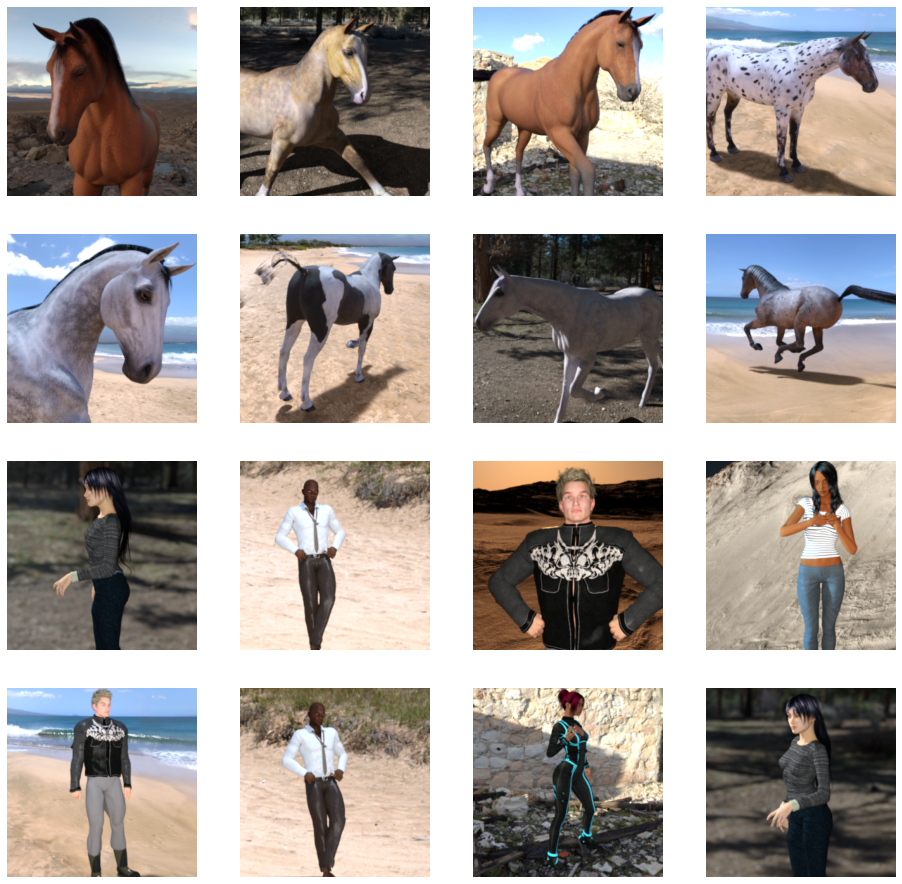

In [ ]:
# Show 8 horses and 8 humans
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Model Building

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

**Data Preprocessing**







In [ ]:
# All images will be rescaled by 1./255
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',
        target_size=(300, 300), 
        batch_size=128,
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',
        target_size=(300, 300),
        batch_size=32,
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


# **Training**





In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 70s 9s/step - loss: 0.5880 - accuracy: 0.6986 - val_loss: 0.5847 - val_accuracy: 0.7656
Epoch 2/15
8/8 [==============================] - 70s 9s/step - loss: 0.3552 - accuracy: 0.8910 - val_loss: 0.8876 - val_accuracy: 0.7656
Epoch 3/15
8/8 [==============================] - 72s 9s/step - loss: 0.2050 - accuracy: 0.9255 - val_loss: 1.6476 - val_accuracy: 0.7930
Epoch 4/15
8/8 [==============================] - 79s 10s/step - loss: 0.1060 - accuracy: 0.9590 - val_loss: 2.2758 - val_accuracy: 0.7891
Epoch 5/15
8/8 [==============================] - 70s 9s/step - loss: 0.0805 - accuracy: 0.9666 - val_loss: 1.8634 - val_accuracy: 0.8047
Epoch 6/15
8/8 [==============================] - 69s 9s/step - loss: 0.0518 - accuracy: 0.9855 - val_loss: 2.7497 - val_accuracy: 0.7656
Epoch 7/15
8/8 [==============================] - 79s 10s/step - loss: 0.0421 - accuracy: 0.9814 - val_loss: 3.3714 - val_accuracy: 0.7656
Epoch 8/15
8/8 [================

**Confusion Matrix & Classification Report**



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

test_steps_per_epoch = np.math.ceil(validation_generator.samples / validation_generator.batch_size)

predictions = (model.predict(validation_generator, batch_size=32) > 0.5).astype("int32")

true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys()) 

print('Confusion Matrix')
print(confusion_matrix(true_classes, predictions))

print('\nClassification Report')
target_names = ['Horse', 'Human']
print(classification_report(true_classes, predictions, target_names=target_names))

Confusion Matrix
[[41 87]
 [39 89]]

Classification Report
              precision    recall  f1-score   support

       Horse       0.51      0.32      0.39       128
       Human       0.51      0.70      0.59       128

    accuracy                           0.51       256
   macro avg       0.51      0.51      0.49       256
weighted avg       0.51      0.51      0.49       256



# **Predict for any new Image**

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")